In [41]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 
import numpy as np

(709, 1354, 3)

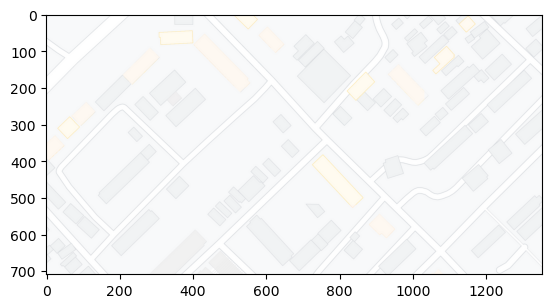

In [42]:
ex1 = mpimg.imread('C:/Users/Eldana/OneDrive - АО Казахстанско-Британский Технический Университет/Documents/Project/fvm/MeshGeneration/screens/ex1.png')
plt.imshow(ex1)
ex1.shape

<h4>Grayscale image</h4>

(709, 1354)

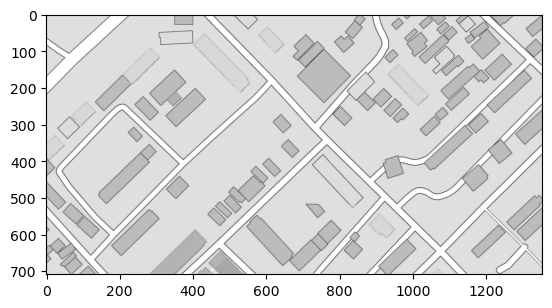

In [43]:
ex_gray = np.mean(ex1, axis = 2)
plt.imshow(ex_gray, cmap='gray')
ex_gray.shape

In [45]:
road = np.copy(ex_gray)
for i in range(len(ex_gray)):
    for j in range(len(ex_gray[i])):
        if ex_gray[i][j] == 1.0:
            road[i][j] = 0.0
        else:
            road[i][j] = 1.0

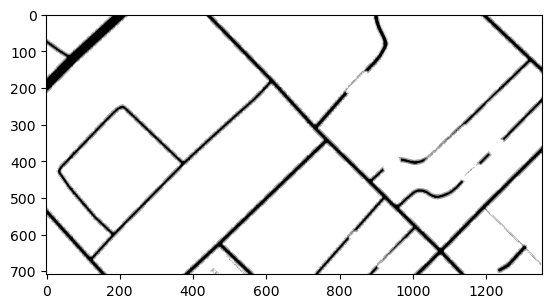

In [46]:
plt.imshow(road, cmap='gray')

In [66]:
ex_gray[0][0]

0.951634

In [71]:
temp1 = np.copy(temp)
for i in range(len(ex_gray)):
    for j in range(len(ex_gray[i])):
        if ex_gray[i][j] == 0.8156863:
            temp1[i][j] = 0.951634

In [72]:
ex_gray.min()

0.8156863

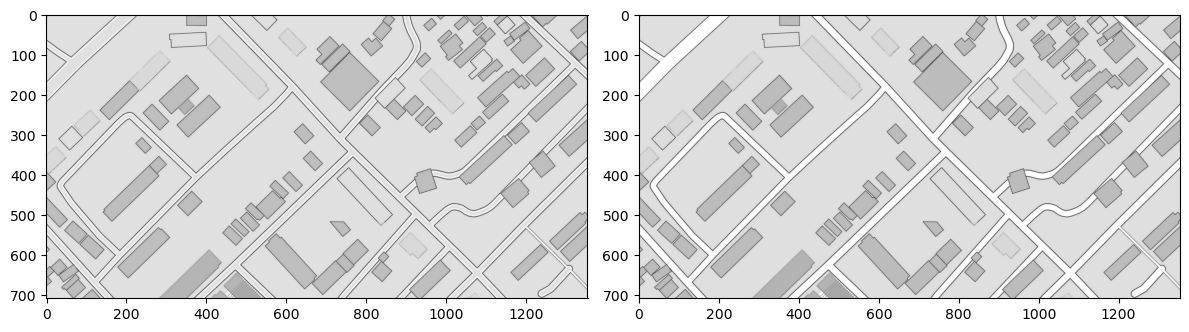

In [77]:
plt.figure(figsize = (12, 12))
plt.subplot(121)
plt.imshow(temp1, cmap='gray')
plt.subplot(122)
plt.imshow(ex_gray, cmap='gray')
plt.tight_layout()

In [4]:
n, m = ex1.shape[0], ex1.shape[1]

In [159]:
def convolution_3channels(img, kernel):
    n, m, l = img.shape[0], img.shape[1], len(kernel)
    layer1 = list()
    layer2 = list()
    layer3 = list()
    for i in range(0, (n-l)+1, l):
        for j in range(0, (m-l)+1, l):
            layer1.append(np.sum(np.multiply(img[i:i+l, j:j+l, :1].reshape(l, l), kernel)))
            layer2.append(np.sum(np.multiply(img[i:i+l, j:j+l, 1:2].reshape(l, l), kernel)))
            layer3.append(np.sum(np.multiply(img[i:i+l, j:j+l, 2:3].reshape(l, l), kernel)))
    layer1 = np.array(layer1).reshape((n//l), (m//l))
    layer2 = np.array(layer2).reshape((n//l), (m//l))
    layer3 = np.array(layer3).reshape((n//l), (m//l))
    return np.stack((layer1, layer2, layer3), axis = -1)

In [88]:
def convolution_1channel(img, kernel):
    n, m, l = img.shape[0], img.shape[1], len(kernel)
    layer1 = list()
    for i in range(0, (n-l)+1, l):
        for j in range(0, (m-l)+1, l):
            layer1.append(np.sum(np.multiply(img[i:i+l, j:j+l], kernel)))
    layer1 = np.array(layer1).reshape((n//l), (m//l))
    return layer1

In [161]:
gaussian_filter = np.array([[2, 4, 5, 4, 2], [4, 9, 12, 9, 4], [5, 12, 15, 12, 5], [4, 9, 12, 9, 4], [2, 4, 5, 4, 2]])

In [162]:
gaussian_filter = np.multiply(gaussian_filter, (1/159))
gaussian_filter

array([[0.01257862, 0.02515723, 0.03144654, 0.02515723, 0.01257862],
       [0.02515723, 0.05660377, 0.0754717 , 0.05660377, 0.02515723],
       [0.03144654, 0.0754717 , 0.09433962, 0.0754717 , 0.03144654],
       [0.02515723, 0.05660377, 0.0754717 , 0.05660377, 0.02515723],
       [0.01257862, 0.02515723, 0.03144654, 0.02515723, 0.01257862]])

<h4>Applying Gaussian filter to reduce noise </h4>

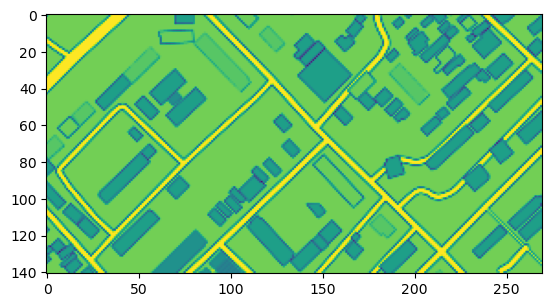

In [164]:
convolved = convolution_1channel(ex_gray, gaussian_filter)
plt.imshow(convolved)

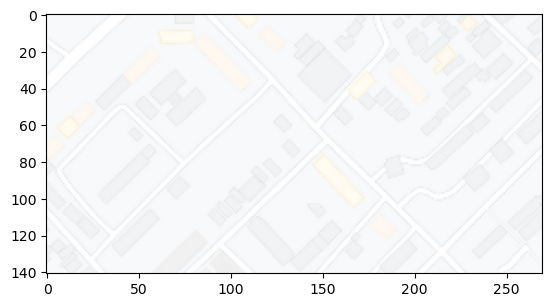

In [126]:
plt.imshow(convolution(ex1, gaussian_filter))

In [104]:
def max_pooling(img, l):
    n, m = img.shape[0], img.shape[1]
    layer1 = list()
    layer2 = list()
    layer3 = list()
    for i in range(0, (n-l), l):
        for j in range(0, (m), l):
            layer1.append(max(img[i:i+l, j:j+l, :1].flatten()))
            layer2.append(max(img[i:i+l, j:j+l, 1:2].flatten()))
            layer3.append(max(img[i:i+l, j:j+l, 2:3].flatten()))
    layer1 = np.array(layer1).reshape((n//l), (m//l))
    layer2 = np.array(layer2).reshape((n//l), (m//l))
    layer3 = np.array(layer3).reshape((n//l), (m//l))
    return np.stack((layer1, layer2, layer3), axis = -1)

In [115]:
convolved = convolution(ex1, gaussian_filter)
convolved.shape

ValueError: cannot reshape array of size 20 into shape (5,5)

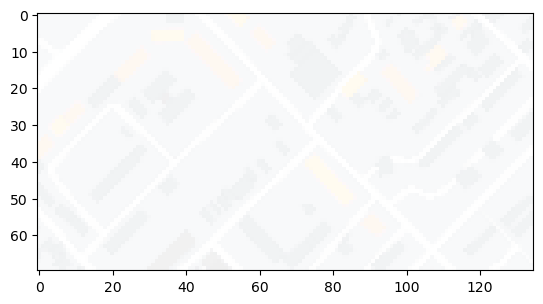

In [106]:
max_pooled = max_pooling(convolved, 2)
# convolved.shape

<h4>Finding the intensity gradient of the image</h4>

In [192]:
Dx = np.array([[-2, -1, 0], [-1, 0, 1], [0, 1, 2]])
Dy = np.array([[0, -1, -2], [1, 0, -1], [2, 1, 0]])

In [197]:
Gx = convolution_1channel(ex1, Dx)
Gy = convolution_1channel(ex1, Dy)
G = np.hypot(Gx, Gy)

In [198]:
G = G / G.max() * 255
theta = np.arctan2(Gy, Gx)

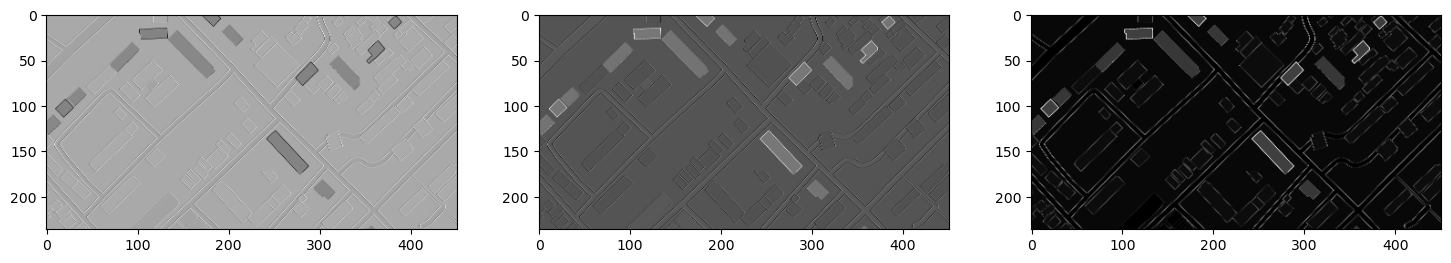

In [199]:
plt.figure(figsize=(18, 18))
plt.subplot(131)
plt.imshow(Gx, cmap='gray')
plt.subplot(132)
plt.imshow(Gy, cmap='gray')
plt.subplot(133)
plt.imshow(G.astype('int'), cmap='gray')

In [86]:
Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

In [168]:
Gx = convolution_1channel(convolved, Kx)
Gy = convolution_1channel(convolved, Ky)
G = np.hypot(Gx, Gy)

In [169]:
G = G / G.max() * 255
theta = np.arctan2(Gy, Gx)

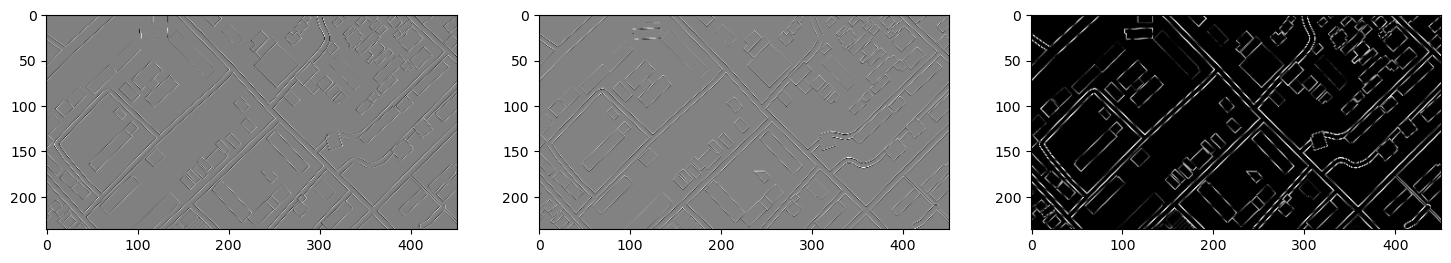

In [91]:
Gx = convolution_1channel(ex_gray, Kx)
Gy = convolution_1channel(ex_gray, Ky)
G = np.hypot(Gx, Gy)
G = G / G.max() * 255
theta = np.arctan2(Gy, Gx)
plt.figure(figsize=(18, 18))
plt.subplot(131)
plt.imshow(Gx, cmap='gray')
plt.subplot(132)
plt.imshow(Gy, cmap='gray')
plt.subplot(133)
plt.imshow(G.astype('int'), cmap='gray')

<h4>ReLU activator</h4>

In [84]:
def ReLU(img):
    n, m = img.shape[0], img.shape[1]
    for i in range(n):
        for j in range(m):
            img[i][j] = max(0, img[i][j])
            
    return img

In [92]:
ex_activated = ReLU(G)

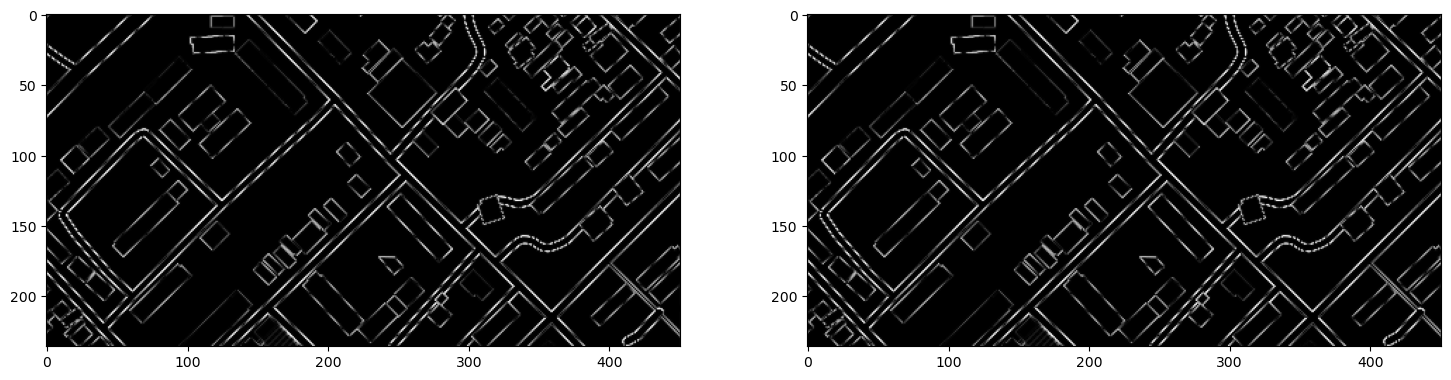

In [180]:
plt.figure(figsize=(18, 18))
plt.subplot(121)
plt.imshow(ex_activated.astype('int'), cmap='gray')
plt.subplot(122)
plt.imshow(G.astype('int'), cmap='gray')

In [79]:
def binary(img):
    n, m = img.shape[0], img.shape[1]
    for i in range(n):
        for j in range(m):
            if img[i][j]!=0:
                img[i][j] =225 
    return img

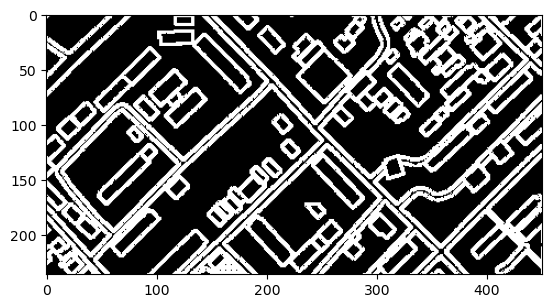

In [93]:
bina = binary(ex_activated)
plt.imshow(bina.astype('int'), cmap='gray')

<h4>Non Maximum Suppression</h4>

In [186]:
# theta*180/np.pi
# G.shape

array([[168.69046946, 135.        , -46.45635807, ...,   0.        ,
         90.        ,  90.        ],
       [133.65211417, -44.99998336,  45.00104501, ..., 135.        ,
        108.43547133,  96.80130601],
       [-45.00002613, -45.        ,   0.        , ..., 146.3097985 ,
        131.69818729, -96.73043781],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 180.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 180.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 180.        ]])

In [82]:
def non_max_suppression(img, theta):
    m, n = img.shape
    result = np.zeros((m,n))
    angle = theta * 180. / np.pi
    angle[angle < 0] += 180
    for i in range(1,m-1):
        for j in range(1,n-1):
            q = 255
            r = 255
            if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                q = img[i, j+1]
                r = img[i, j-1]
            elif (22.5 <= angle[i,j] < 67.5):
                q = img[i+1, j-1]
                r = img[i-1, j+1]
            elif (67.5 <= angle[i,j] < 112.5):
                q = img[i+1, j]
                r = img[i-1, j]
            elif (112.5 <= angle[i,j] < 157.5):
                q = img[i-1, j-1]
                r = img[i+1, j+1]
            if (img[i,j] >= q) and (img[i,j] >= r):
                result[i,j] = img[i,j]
            else:
                result[i,j] = 0
    
    return result

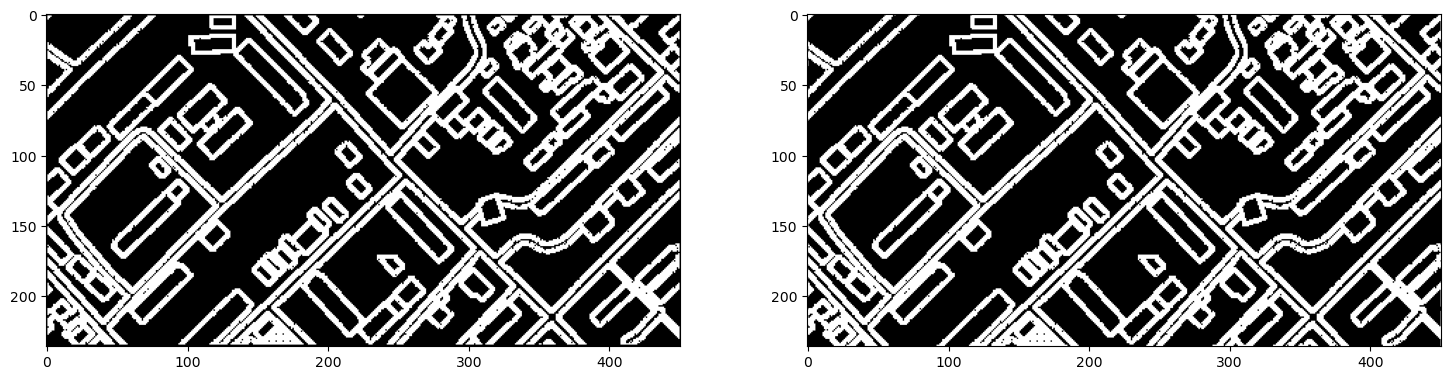

In [94]:
nms = non_max_suppression(ex_activated, theta)
plt.figure(figsize=(18, 18))
plt.subplot(121)
plt.imshow(nms.astype('int'), cmap='gray')
plt.subplot(122)
plt.imshow(ex_activated.astype('int'), cmap='gray')

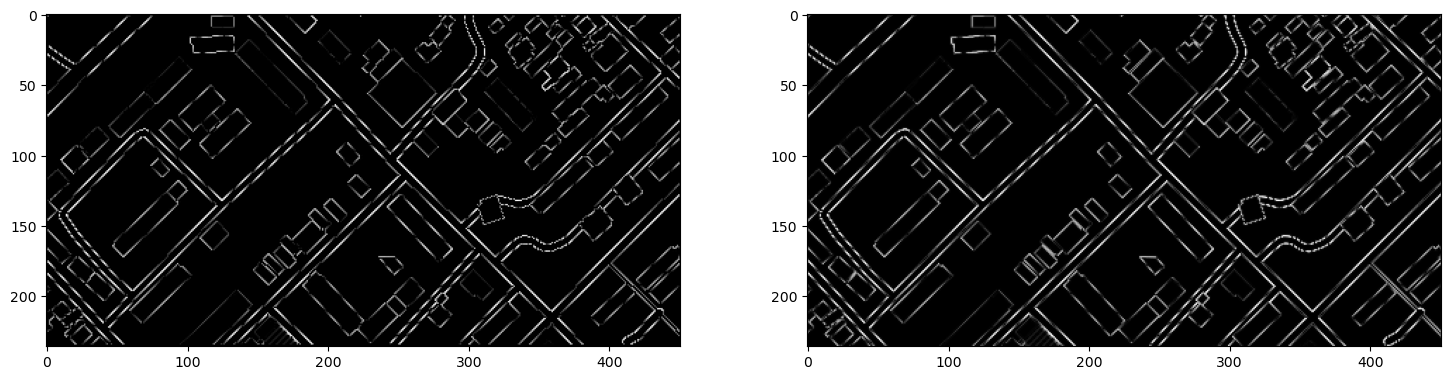

In [191]:
nms = non_max_suppression(ex_activated, theta)
plt.figure(figsize=(18, 18))
plt.subplot(121)
plt.imshow(nms.astype('int'), cmap='gray')
plt.subplot(122)
plt.imshow(ex_activated.astype('int'), cmap='gray')

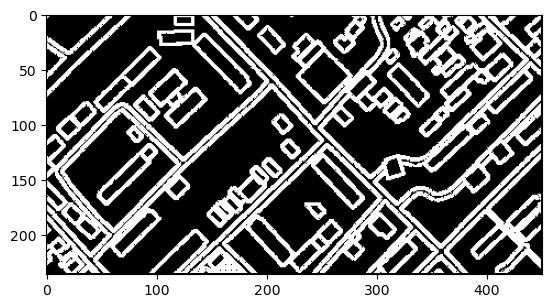

In [95]:
bina = binary(nms)
plt.imshow(bina.astype('int'), cmap='gray')

In [118]:
X = list()
Y = list()
for i in range(len(bina)):
    for j in range(len(bina[i])):
        if bina[i][j] == 225:
            X.append(i)
            Y.append(j)

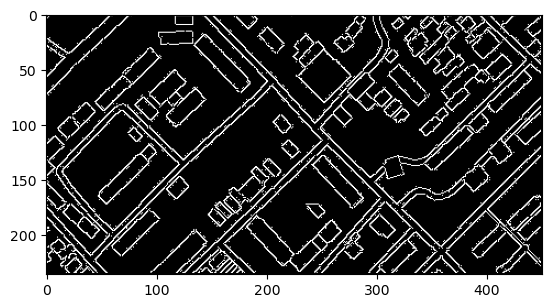

In [214]:
bina = binary(nms)
plt.imshow(bina.astype('int'), cmap='gray')

In [129]:
len = np.sqrt(X.max()**2 + Y.max()**2)
X=np.array(X)/len
Y=np.array(Y)/len

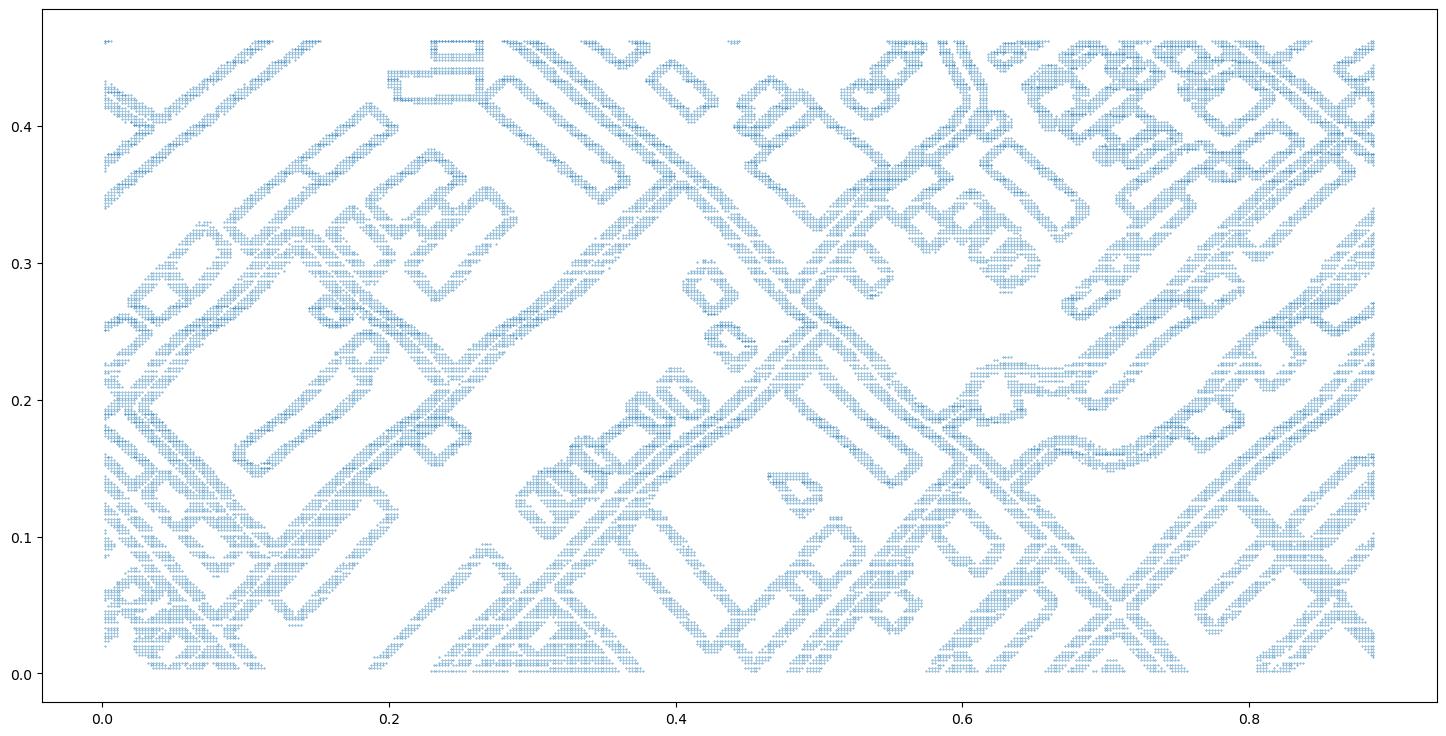

In [132]:
plt.figure(figsize=(18, 9))
plt.scatter(Y, X[::-1], s = 0.1)

In [133]:
X = X[::-1]

In [135]:
points = zip(X, Y)
points

<h4> Quadtree </h4>

In [138]:
points = list()
quads = [[[0, X.max()], [0, Y.max()]]]  

In [137]:
def check(x, y):
   
        

In [ ]:
while(len(points)<10):
    for i in range(len(quads):
        for i, j in zip(X, Y):
            if i >= 

<h4>Double Threshold</h4>

(4000, 4684, 3)

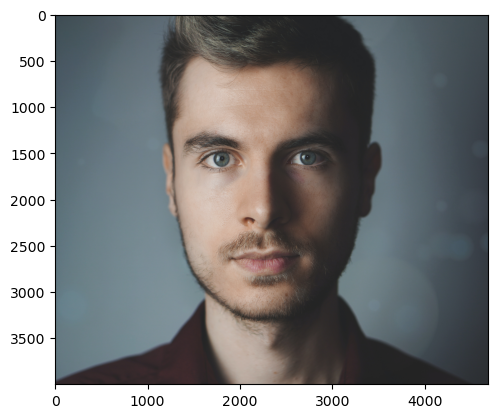

In [146]:
cat1 = mpimg.imread('C:/Users/Eldana/OneDrive - АО Казахстанско-Британский Технический Университет/Documents/Project/ML/human.jpg')
plt.imshow(cat1)
cat1.shape

In [147]:
Px = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
Py = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

In [148]:
Gx = convolution(cat1, Px)
Gy = convolution(cat1, Py)
G = np.hypot(Gx, Gy)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


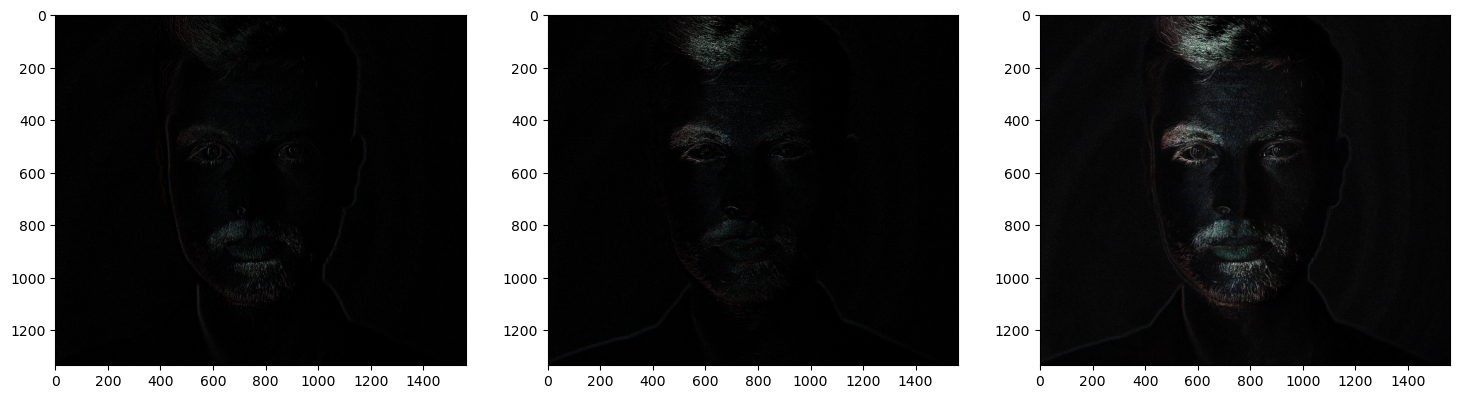

In [149]:
plt.figure(figsize=(18, 18))
plt.subplot(131)
plt.imshow(Gx)
plt.subplot(132)
plt.imshow(Gy)
plt.subplot(133)
plt.imshow(G.astype('int'))

In [150]:
P05x = np.array([[-1, 0, 0.5], [-1, 0, 0.5], [-1, 0, 0.5]])
P05y = np.array([[0.5, 0.5, 0.5], [0, 0, 0], [-1, -1, -1]])

In [152]:
G05x = convolution(cat1, P05x)
G05y = convolution(cat1, P05y)
G05 = np.hypot(G05x, G05y)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


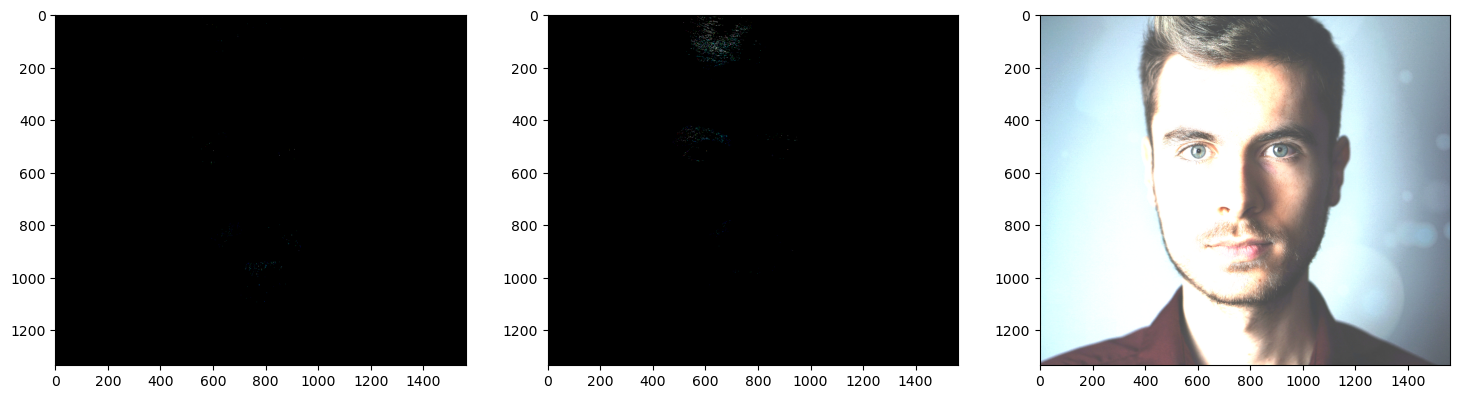

In [153]:
plt.figure(figsize=(18, 18))
plt.subplot(131)
plt.imshow(G05x)
plt.subplot(132)
plt.imshow(G05y)
plt.subplot(133)
plt.imshow(G05.astype('int'))